# Feature Selection

In [1]:
import matplotlib.pyplot as plt
import pandas as pd
import numpy as np
from sklearn.model_selection import train_test_split

pd.set_option('display.max_rows', None)
pd.set_option('display.max_columns', None)

In [2]:
df_origin = pd.read_csv('Android_Malware.csv', low_memory=False)
df = df_origin.copy()

In [3]:
df.columns = df.columns.str.strip()

In [4]:
df.head()

,Unnamed: 0,Flow ID,Source IP,Source Port,Destination IP,Destination Port,Protocol,Timestamp,Flow Duration,Total Fwd Packets,Total Backward Packets,Total Length of Fwd Packets,Total Length of Bwd Packets,Fwd Packet Length Max,Fwd Packet Length Min,Fwd Packet Length Mean,Fwd Packet Length Std,Bwd Packet Length Max,Bwd Packet Length Min,Bwd Packet Length Mean,Bwd Packet Length Std,Flow Bytes/s,Flow Packets/s,Flow IAT Mean,Flow IAT Std,Flow IAT Max,Flow IAT Min,Fwd IAT Total,Fwd IAT Mean,Fwd IAT Std,Fwd IAT Max,Fwd IAT Min,Bwd IAT Total,Bwd IAT Mean,Bwd IAT Std,Bwd IAT Max,Bwd IAT Min,Fwd PSH Flags,Bwd PSH Flags,Fwd URG Flags,Bwd URG Flags,Fwd Header Length,Bwd Header Length,Fwd Packets/s,Bwd Packets/s,Min Packet Length,Max Packet Length,Packet Length Mean,Packet Length Std,Packet Length Variance,FIN Flag Count,SYN Flag Count,RST Flag Count,PSH Flag Count,ACK Flag Count,URG Flag Count,CWE Flag Count,ECE Flag Count,Down/Up Ratio,Average Packet Size,Avg Fwd Segment Size,Avg Bwd Segment Size,Fwd Header Length.1,Fwd Avg Bytes/Bulk,Fwd Avg Packets/Bulk,Fwd Avg Bulk Rate,Bwd Avg Bytes/Bulk,Bwd Avg Packets/Bulk,Bwd Avg Bulk Rate,Subflow Fwd Packets,Subflow Fwd Bytes,Subflow Bwd Packets,Subflow Bwd Bytes,Init_Win_bytes_forward,Init_Win_bytes_backward,act_data_pkt_fwd,min_seg_size_forward,Active Mean,Active Std,Active Max,Active Min,Idle Mean,Idle Std,Idle Max,Idle Min,Label
0,0,172.217.6.202-10.42.0.211-443-50004-6,10.42.0.211,50004,172.217.6.202,443.0,6.0,13/06/2017 11:52:39,37027,1,1,0.0,0.0,0.0,0.0,0.000,0.000000,0.0,0.0,0.000000,0.000000,0.000000,54.014638,3.702700e+04,0.000000e+00,37027.0,37027.0,0.0,0.000000e+00,0.000000e+00,0.0,0.0,0.0,0.000000,0.000000,0.0,0.0,0.0,0.0,0,0,32,32,27.007319,27.007319,0.0,0.0,0.000000,0.000000,0.000000,0.0,0.0,0.0,0.0,1.0,1.0,0,0.0,1.0,0.000000,0.000,0.000000,32.0,0,0.0,0.0,0.0,0.0,0.0,1.0,0.0,1.0,0.0,2994.0,362.0,0.0,32.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,Android_Adware
1,1,172.217.6.202-10.42.0.211-443-35455-6,10.42.0.211,35455,172.217.6.202,443.0,6.0,13/06/2017 11:52:39,36653,1,1,0.0,0.0,0.0,0.0,0.000,0.000000,0.0,0.0,0.000000,0.000000,0.000000,54.565793,3.665300e+04,0.000000e+00,36653.0,36653.0,0.0,0.000000e+00,0.000000e+00,0.0,0.0,0.0,0.000000,0.000000,0.0,0.0,0.0,0.0,0,0,32,32,27.282896,27.282896,0.0,0.0,0.000000,0.000000,0.000000,0.0,0.0,0.0,0.0,1.0,1.0,0,0.0,1.0,0.000000,0.000,0.000000,32.0,0,0.0,0.0,0.0,0.0,0.0,1.0,0.0,1.0,0.0,2860.0,362.0,0.0,32.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,Android_Adware
2,2,131.253.61.68-10.42.0.211-443-51775-6,10.42.0.211,51775,131.253.61.68,443.0,6.0,13/06/2017 11:52:42,534099,8,12,1011.0,11924.0,581.0,0.0,126.375,207.799311,1460.0,0.0,993.666667,656.474376,24218.356522,37.446241,2.811047e+04,4.314810e+04,158676.0,8.0,481340.0,6.876286e+04,6.237618e+04,158676.0,449.0,487990.0,44362.727273,86342.042540,217790.0,8.0,0.0,0.0,0,0,180,244,14.978496,22.467745,0.0,1460.0,615.952381,672.744786,452585.547619,0.0,0.0,0.0,1.0,0.0,0.0,0,0.0,1.0,646.750000,126.375,993.666667,180.0,0,0.0,0.0,0.0,0.0,0.0,8.0,1011.0,12.0,11924.0,65535.0,63441.0,3.0,20.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,Android_Adware
3,3,131.253.61.68-10.42.0.211-443-51775-6,10.42.0.211,51775,131.253.61.68,443.0,6.0,13/06/2017 11:52:43,9309,3,0,0.0,0.0,0.0,0.0,0.000,0.000000,0.0,0.0,0.000000,0.000000,0.000000,322.268772,4.654500e+03,5.137131e+03,8287.0,1022.0,9309.0,4.654500e+03,5.137131e+03,8287.0,1022.0,0.0,0.000000,0.000000,0.0,0.0,0.0,0.0,0,0,60,0,322.268772,0.000000,0.0,0.0,0.000000,0.000000,0.000000,0.0,0.0,0.0,0.0,1.0,0.0,0,0.0,0.0,0.000000,0.000,0.000000,60.0,0,0.0,0.0,0.0,0.0,0.0,3.0,0.0,0.0,0.0,65535.0,-1.0,0.0,20.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,Android_Adware
4,4,131.253.61.68-10.42.0.211-443-51776-6,10.42.0.211,51776,131.253.61.68,443.0,6.0,13/06/2017 11:52:42,19890496,8,6,430.0,5679.0,218.0,0.0,53.750,99.538578,1460.0,0.0,946.500000,710.412204,307.131607,0.703854,1.530038e+06,5.377887e+06,19426714.0,7.0,19890496.0,2.841499e+06,7.314093e+06,19426714.0,639.0,410964.0,82192.800000,154845.683018,355945.0,7

## Consolidate columns
* Getting the difference of various fwd and bwd metrics and combiining them into one column

In [5]:
# Define the pairs of columns for differences
packet_pairs = [('Total Fwd Packets', 'Total Backward Packets'),
                ('Total Length of Fwd Packets', 'Total Length of Bwd Packets'),
                ('Fwd IAT Total', 'Bwd IAT Total'),
                ('Fwd PSH Flags', 'Bwd PSH Flags'),
                ('Fwd URG Flags', 'Bwd URG Flags'),
                ('Fwd Header Length', 'Bwd Header Length'),
                ('Fwd Packets/s', 'Bwd Packets/s'),
                ('Avg Fwd Segment Size', 'Avg Bwd Segment Size'),
                ('Fwd Avg Bytes/Bulk', 'Bwd Avg Bytes/Bulk'),
                ('Fwd Avg Packets/Bulk', 'Bwd Avg Packets/Bulk'),
                ('Fwd Avg Bulk Rate', 'Bwd Avg Bulk Rate'),
                ('Subflow Fwd Packets', 'Subflow Bwd Packets'),
                ('Subflow Fwd Bytes', 'Subflow Bwd Bytes'),
                ('Init_Win_bytes_forward', 'Init_Win_bytes_backward')]

# Convert columns to numeric before calculating differences
df = df.apply(pd.to_numeric, errors='coerce')

# Calculate differences for each pair and create separate columns
for pair in packet_pairs:
    col_name_diff = f'{pair[0]} - {pair[1]}'
    df[col_name_diff] = df[pair[0]] - df[pair[1]]

In [6]:
# List of all columns to drop
columns_to_drop = [
    'Unnamed: 0', 'Flow ID', 'Source IP', 'Source Port', 'Destination IP', 'Destination Port',
    'Protocol', 'Timestamp', 'Total Fwd Packets', 'Total Backward Packets',
    'Total Length of Fwd Packets', 'Total Length of Bwd Packets',
    'Fwd Packet Length Max', 'Fwd Packet Length Min', 'Fwd Packet Length Std',
    'Bwd Packet Length Max', 'Bwd Packet Length Min', 'Bwd Packet Length Std',
    'Flow IAT Std', 'Flow IAT Max', 'Flow IAT Min',
    'Fwd IAT Total', 'Fwd IAT Std', 'Fwd IAT Max', 'Fwd IAT Min',
    'Bwd IAT Total', 'Bwd IAT Std', 'Bwd IAT Max', 'Bwd IAT Min',
    'Fwd PSH Flags', 'Bwd PSH Flags', 'Fwd URG Flags', 'Bwd URG Flags',
    'Fwd Header Length', 'Bwd Header Length', 'Fwd Packets/s', 'Bwd Packets/s',
    'Min Packet Length', 'Max Packet Length', 'Packet Length Std', 'Packet Length Variance',
    'ECE Flag Count', 'Avg Fwd Segment Size', 'Avg Bwd Segment Size',
    'Fwd Header Length.1', 'Fwd Avg Bytes/Bulk', 'Fwd Avg Packets/Bulk', 'Fwd Avg Bulk Rate',
    'Bwd Avg Bytes/Bulk', 'Bwd Avg Packets/Bulk', 'Bwd Avg Bulk Rate',
    'Subflow Fwd Packets', 'Subflow Fwd Bytes', 'Subflow Bwd Packets', 'Subflow Bwd Bytes',
    'Init_Win_bytes_forward', 'Init_Win_bytes_backward',
    'Active Std', 'Active Max', 'Active Min', 'Idle Std', 'Idle Max', 'Idle Min'
]
# Drop the specified columns
df = df.drop(columns=columns_to_drop, errors='ignore')

In [7]:
df['Label'] = df_origin['Label']
df = df.dropna()

In [8]:
features = df.drop('Label', axis=1)  # Features
target = df['Label']

In [9]:
X_train, X_test, y_train, y_test = train_test_split(features, target, random_state=0)


* Inspecting pairs of columns that are highly correlated in which one can be potentially dropped

In [14]:
correlation_matrix = df.corr()

# Get the upper triangle of the correlation matrix (excluding the diagonal)
upper_triangle = correlation_matrix.where(
    np.triu(np.ones(correlation_matrix.shape), k=1).astype(bool)
)

# Find highly correlated columns
highly_correlated_columns = [column for column in upper_triangle.columns if any(upper_triangle[column] > 0.9)]

# Print or further analyze the highly correlated columns
highly_correlated_columns

/var/folders/fj/b4kslzys29z99zrb9vdgx_4w0000gn/T/ipykernel_38063/31985062.py:1: FutureWarning: The default value of numeric_only in DataFrame.corr is deprecated. In a future version, it will default to False. Select only valid columns or specify the value of numeric_only to silence this warning.
  correlation_matrix = df.corr()


['Fwd IAT Mean',
 'Packet Length Mean',
 'Average Packet Size',
 'Total Length of Fwd Packets - Total Length of Bwd Packets',
 'Fwd PSH Flags - Bwd PSH Flags',
 'Subflow Fwd Packets - Subflow Bwd Packets',
 'Subflow Fwd Bytes - Subflow Bwd Bytes',
 'Init_Win_bytes_forward - Init_Win_bytes_backward']

In [10]:
from sklearn.ensemble import RandomForestClassifier
forest = RandomForestClassifier(n_estimators=20, random_state=0)
forest.fit(X_train, y_train)

print("Training set accuracy: {:.3f}".format(forest.score(X_train, y_train)))
print("Test set accuracy: {:.3f}".format(forest.score(X_test, y_test)))

Training set accuracy: 0.956
Test set accuracy: 0.502


* Inspect and remove low importance features

Index(['Flow Duration', 'Fwd Packet Length Mean', 'Bwd Packet Length Mean',
       'Flow Bytes/s', 'Flow Packets/s', 'Flow IAT Mean', 'Fwd IAT Mean',
       'Bwd IAT Mean', 'Packet Length Mean', 'Average Packet Size',
       'Total Length of Fwd Packets - Total Length of Bwd Packets',
       'Fwd IAT Total - Bwd IAT Total',
       'Fwd Header Length - Bwd Header Length',
       'Fwd Packets/s - Bwd Packets/s',
       'Avg Fwd Segment Size - Avg Bwd Segment Size',
       'Subflow Fwd Bytes - Subflow Bwd Bytes',
       'Init_Win_bytes_forward - Init_Win_bytes_backward'],
      dtype='object')

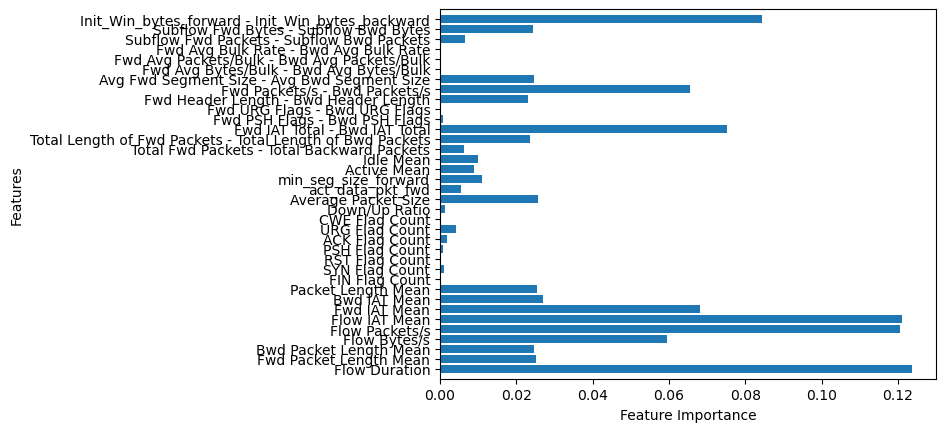

In [19]:
def plot_and_remove_low_importance_features(model, features, threshold=0.02):
    # Plot feature importances
    n_features = features.shape[1]
    plt.barh(np.arange(n_features), model.feature_importances_, align='center')
    plt.yticks(np.arange(n_features), features.columns)  # Use column names for y-axis ticks
    plt.xlabel("Feature Importance")
    plt.ylabel("Features")
    plt.ylim(-1, n_features)
    
    # Remove features with importance less than the threshold
    selected_features = features.columns[model.feature_importances_ >= threshold]
    
    return selected_features

# Example usage
selected_features = plot_and_remove_low_importance_features(forest, features)
selected_features

* Using lasso regression to determine important features

In [11]:
df_origin = pd.read_csv('Android_Malware_clean.csv', low_memory=False)
df = df_origin.copy()

In [12]:
def type_replace(value):
    new_value = None  # Initialize new_value
    if value == 'Android_Adware':
        new_value = 1
    elif value == 'Android_Scareware':
        new_value = 2
    elif value == 'Android_SMS_Malware':
        new_value = 3
    elif value == 'Benign':
      new_value = 4
    return new_value

df['Label'] = df['Label'].apply(type_replace)

In [13]:
features = df.drop('Label', axis=1)  # Features
target = df['Label']  # Target variable

# Split the data into training and testing sets
X_train, X_test, y_train, y_test = train_test_split(features, target, test_size=0.2, random_state=42)


In [14]:
from sklearn.linear_model import Lasso

# Filter numeric columns
numeric_columns = X_train.select_dtypes(include='number').columns

# Fit Lasso model
alpha = 0.9
lasso_model = Lasso(alpha=alpha)
lasso_model.fit(X_train[numeric_columns], y_train)

# Ensure X_train and X_test have the same numeric columns
X_train = X_train[numeric_columns]
X_test = X_test[numeric_columns]

# Get feature coefficients
coefficients = pd.Series(lasso_model.coef_, index=numeric_columns)

# Select only non-zero coefficients
non_zero_coefficients = coefficients[coefficients != 0]

# Extract features based on non-zero coefficients
selected_features = non_zero_coefficients.index

selected_features


/Users/adrianjaucian/anaconda3/lib/python3.11/site-packages/sklearn/linear_model/_coordinate_descent.py:628: ConvergenceWarning: Objective did not converge. You might want to increase the number of iterations, check the scale of the features or consider increasing regularisation. Duality gap: 1.213e+05, tolerance: 2.454e+01
  model = cd_fast.enet_coordinate_descent(


Index(['Source Port', 'Destination Port', 'Flow Duration',
       'Total Length of Fwd Packets', 'Total Length of Bwd Packets',
       'Fwd Packet Length Max', 'Fwd Packet Length Min',
       'Bwd Packet Length Max', 'Flow Bytes/s', 'Flow Packets/s',
       'Flow IAT Mean', 'Flow IAT Std', 'Flow IAT Max', 'Flow IAT Min',
       'Fwd IAT Total', 'Fwd IAT Mean', 'Fwd IAT Std', 'Fwd IAT Max',
       'Fwd IAT Min', 'Bwd IAT Total', 'Bwd IAT Mean', 'Bwd IAT Std',
       'Bwd IAT Max', 'Bwd IAT Min', 'Fwd Header Length', 'Bwd Header Length',
       'Fwd Packets/s', 'Bwd Packets/s', 'Max Packet Length',
       'Packet Length Variance', 'Subflow Fwd Bytes', 'Subflow Bwd Bytes',
       'Init_Win_bytes_forward', 'min_seg_size_forward', 'Active Mean',
       'Active Std', 'Active Max', 'Active Min', 'Idle Mean', 'Idle Std',
       'Idle Max', 'Idle Min'],
      dtype='object')

In [16]:
from sklearn.model_selection import train_test_split
from sklearn.ensemble import RandomForestClassifier
from sklearn.metrics import accuracy_score

# Select features and target variable
features = df[(['Source Port', 'Destination Port', 'Flow Duration',
       'Total Length of Fwd Packets', 'Total Length of Bwd Packets',
       'Fwd Packet Length Max', 'Fwd Packet Length Min',
       'Bwd Packet Length Max', 'Flow Bytes/s', 'Flow Packets/s',
       'Flow IAT Mean', 'Flow IAT Std', 'Flow IAT Max', 'Flow IAT Min',
       'Fwd IAT Total', 'Fwd IAT Mean', 'Fwd IAT Std', 'Fwd IAT Max',
       'Fwd IAT Min', 'Bwd IAT Total', 'Bwd IAT Mean', 'Bwd IAT Std',
       'Bwd IAT Max', 'Bwd IAT Min', 'Fwd Header Length', 'Bwd Header Length',
       'Fwd Packets/s', 'Bwd Packets/s', 'Max Packet Length',
       'Packet Length Variance', 'Subflow Fwd Bytes', 'Subflow Bwd Bytes',
       'Init_Win_bytes_forward', 'min_seg_size_forward', 'Active Mean',
       'Active Std', 'Active Max', 'Active Min', 'Idle Mean', 'Idle Std',
       'Idle Max', 'Idle Min'])]
target = df['Label']

# Reduce the dataset size to, for example, 10%
# small_features, _, small_target, _ = train_test_split(features, target, test_size=0.9, random_state=0)

# Split the reduced dataset into training and testing sets
X_train, X_test, y_train, y_test = train_test_split(features, target, test_size=0.2, random_state=0)

# Initialize RandomForestClassifier with your chosen hyperparameters
forest = RandomForestClassifier(max_depth=20, min_samples_leaf=1, min_samples_split=2, n_estimators=50, class_weight='balanced', random_state=0)

# Fit the model on the training data
forest.fit(X_train, y_train)

# Make predictions on the test set
predictions = forest.predict(X_test)

# Evaluate the model
accuracy = accuracy_score(y_test, predictions)
print("Test set accuracy: {:.3f}".format(accuracy))


Test set accuracy: 0.503


Index(['Source Port', 'Destination Port', 'Flow Duration',
       'Total Length of Fwd Packets', 'Total Length of Bwd Packets',
       'Fwd Packet Length Max', 'Flow Bytes/s', 'Flow Packets/s',
       'Flow IAT Mean', 'Flow IAT Std', 'Flow IAT Max', 'Flow IAT Min',
       'Fwd IAT Total', 'Fwd IAT Mean', 'Fwd IAT Std', 'Fwd IAT Max',
       'Fwd IAT Min', 'Fwd Packets/s', 'Bwd Packets/s',
       'Packet Length Variance', 'Subflow Fwd Bytes', 'Subflow Bwd Bytes',
       'Init_Win_bytes_forward'],
      dtype='object')

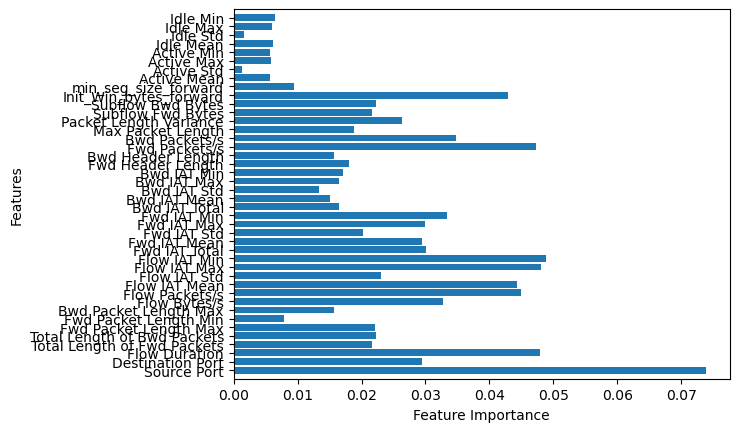

In [17]:
import matplotlib.pyplot as plt
def plot_and_remove_low_importance_features(model, features, threshold=0.02):
    # Plot feature importances
    n_features = features.shape[1]
    plt.barh(np.arange(n_features), model.feature_importances_, align='center')
    plt.yticks(np.arange(n_features), features.columns)  # Use column names for y-axis ticks
    plt.xlabel("Feature Importance")
    plt.ylabel("Features")
    plt.ylim(-1, n_features)
    
    # Remove features with importance less than the threshold
    selected_features = features.columns[model.feature_importances_ >= threshold]
    
    return selected_features

# Example usage
selected_features = plot_and_remove_low_importance_features(forest, features)
selected_features